In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns

In [2]:
# загрузим данные по заправкам топлива
data = pd.read_csv('/datasets/fuel_costs.csv', sep=',')

In [3]:
# меняем тип данных
data['refueling_day'] = pd.to_datetime(data['refueling_day'], format='%Y-%m-%dT%H:%M:%S')

In [4]:
# создание нового столбца "cost"
data['cost'] = (data['price_per_liter'] * data['liters']).astype('float')

In [5]:
# смотрим на данные
data.sample(5, random_state = 0)

,refueling_day,type_of_fuel,price_per_liter,liters,odometer,cost
26,2021-12-27,gas,26.7,37.94,216783,1012.998
85,2022-04-30,gas,11.5,36.53,229120,420.095
2,2021-10-25,gas,24.6,38.76,211433,953.496
55,2022-03-01,gas,24.0,33.33,222869,799.920
68,2022-04-01,gas,14.6,25.54,225489,372.884


<AxesSubplot:xlabel='type_of_fuel', ylabel='count'>

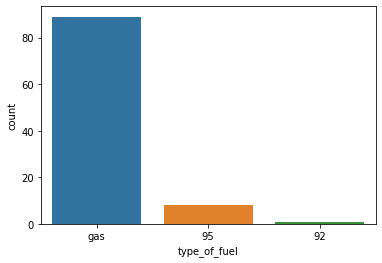

In [6]:
# виды заправляемого топлива, их частота
sns.countplot(data=data, x='type_of_fuel')

In [7]:
# общая информация
total_visits = len(data) 
print(f'Количество заездов на ЗС: {total_visits}')
print(data['refueling_day'].min(), data['refueling_day'].max())
print(data['type_of_fuel'].value_counts().sort_values(ascending=False).head(10))

Количество заездов на ЗС: 98
2021-10-19 00:00:00 2022-05-27 00:00:00
gas    89
95      8
92      1
Name: type_of_fuel, dtype: int64


<AxesSubplot:xlabel='liters'>

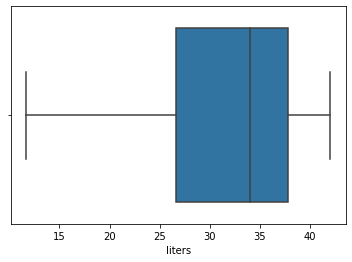

In [8]:
# газа заправляется
sns.boxplot(x=data.query('type_of_fuel == "gas"')['liters'])

<AxesSubplot:xlabel='liters'>

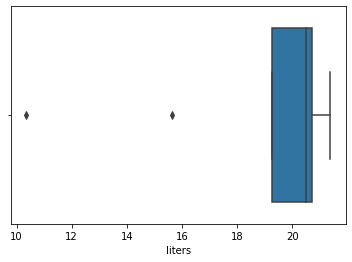

In [9]:
# 95 ого заправляется
sns.boxplot(x=data.query('type_of_fuel == "95"')['liters'])

<AxesSubplot:xlabel='liters'>

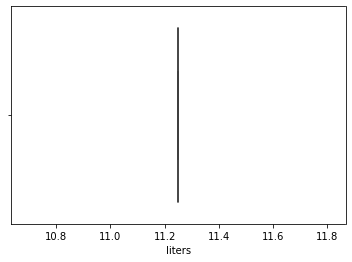

In [10]:
# 92 ого заправляется
sns.boxplot(x=data.query('type_of_fuel == "92"')['liters'])

<AxesSubplot:xlabel='refueling_day'>

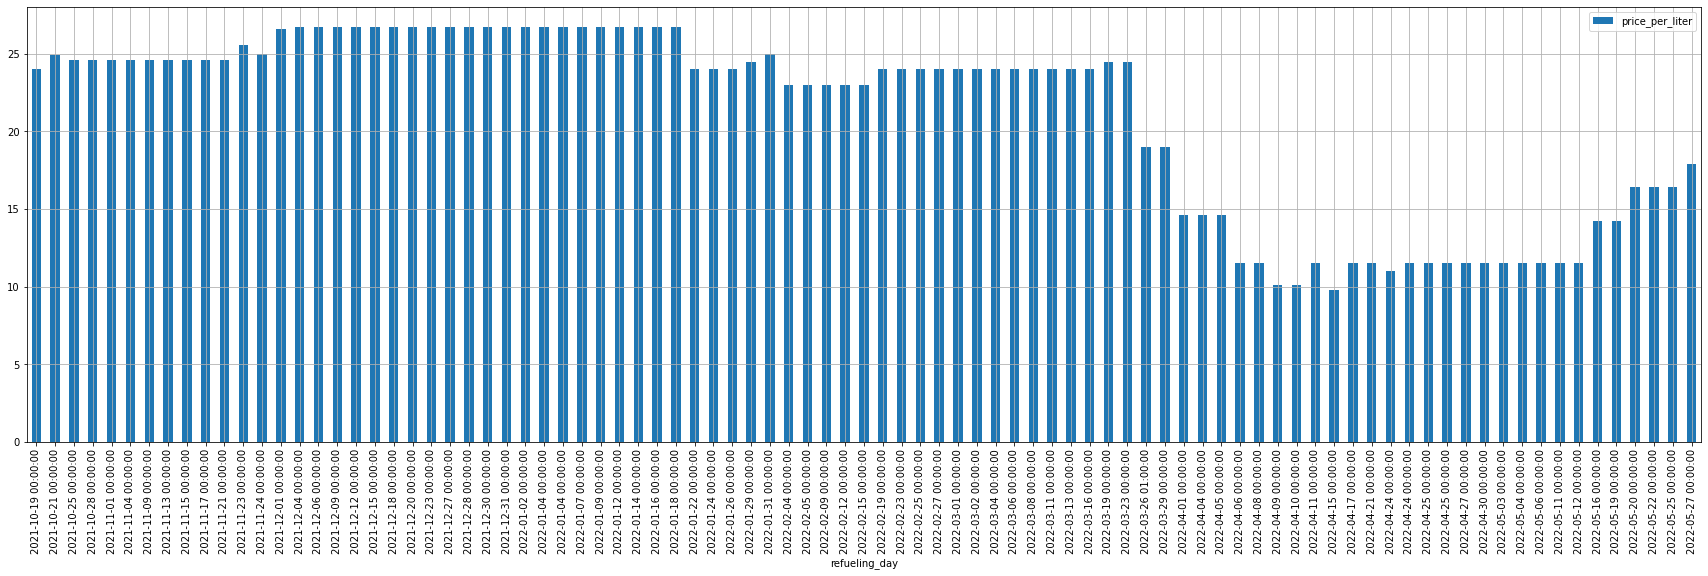

In [12]:
(data
 .query('type_of_fuel == "gas"')
 .plot(x='refueling_day', y='price_per_liter', kind='bar', style='o-', grid=True, figsize=(30, 8))
)